In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Loading sklearn functionality 
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_classif, f_regression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Important functionality for this lesson ---> Statistical tools for model building etc
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [8]:
file_path = r'C:\Users\karni\OneDrive\Documents\GitHub\BrainStation_CapstoneProject\data\power_weather.csv'
power_df_clean = pd.read_csv(file_path, parse_dates=['DateTime'], index_col='DateTime')
power_df_clean.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,surface_pressure,cloudcover,windspeed_10m,windgusts_10m,winddirection_10m,shortwave_radiation,direct_radiation,diffuse_radiation
DateTime,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,7.120,94.200,6.240,4.100,1012.400,100.0,14.280,31.100,329.400,8.000,0.0,8.000
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,7.108,94.167,6.225,4.092,1012.417,100.0,14.242,31.075,329.417,7.833,0.0,7.833
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,7.097,94.133,6.210,4.083,1012.433,100.0,14.203,31.050,329.433,7.667,0.0,7.667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,7.085,94.100,6.195,4.075,1012.450,100.0,14.165,31.025,329.450,7.500,0.0,7.500
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,7.073,94.067,6.180,4.067,1012.467,100.0,14.127,31.000,329.467,7.333,0.0,7.333


In [3]:
power_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   temperature_2m         float64
 8   relative_humidity_2m   float64
 9   dew_point_2m           float64
 10  apparent_temperature   float64
 11  surface_pressure       float64
 12  cloudcover             float64
 13  windspeed_10m          float64
 14  windgusts_10m          float64
 15  winddirection_10m      float64
 16  shortwave_radiation    float64
 17  direct_radiation       float64
 18  diffuse_radiation      float64
dtypes: float64(19)
memory usage: 312.7 MB


## <a id='toc4_1_'></a>EDA: Global_active_power   [&#8593;](#toc0_)

First we will take a look at the `Global_active_power` column - this is the variable of interest (dependent variable) that we would like to predict.

First, let's take a look at the distinct values in this variable.

Text(0, 0.5, 'Global Active Power (kilowatts)')

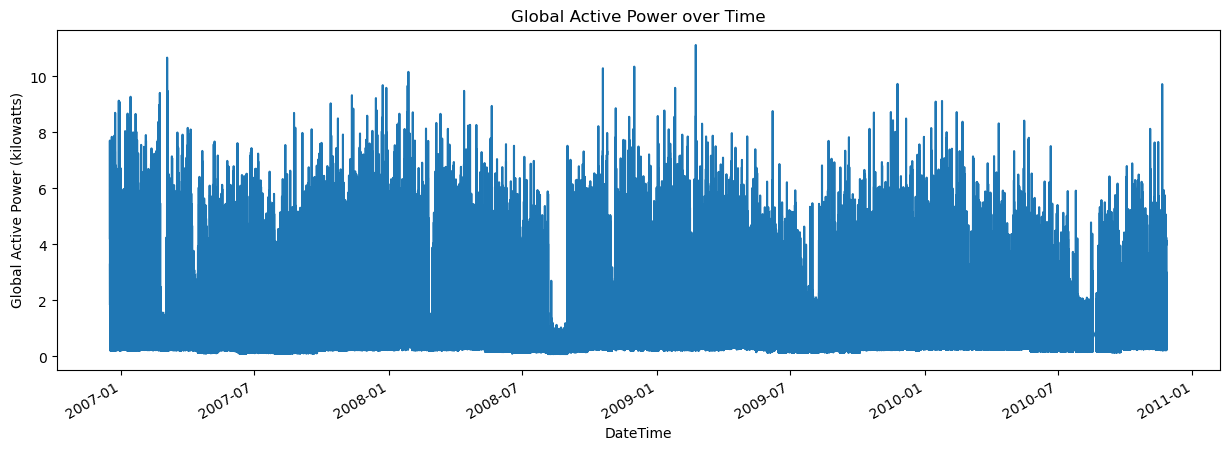

In [4]:
# Look at the "Global_active_power" column over time
power_df_clean["Global_active_power"].plot(figsize=(15,5))
plt.title("Global Active Power over Time")
plt.ylabel("Global Active Power (kilowatts)")

In [5]:
pd.options.display.float_format = '{:.2f}'.format #Changing format to display numeric values instead of scientific notation

# Displaying the descriptive statistics of the "Global_active_power" column
power_df_clean.describe()["Global_active_power"].round(2) # rounding to 2 decimal places


count   2049280.00
mean          1.09
std           1.06
min           0.08
25%           0.31
50%           0.60
75%           1.53
max          11.12
Name: Global_active_power, dtype: float64


We can see that the average power consumption is around 1.2 kilowatts, with a maximum of 11.2 kilowatts and a minimum of 0.08 kilowatts.


In [37]:
#lets look at monthly power usage
# the "M" option specifies 	monthly frequency 
power_df_clean_monthly = power_df_clean.resample("MS").mean()

power_df_clean_monthly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,surface_pressure,cloudcover,windspeed_10m,windgusts_10m,winddirection_10m,shortwave_radiation,direct_radiation,diffuse_radiation
DateTime,,,,,,,,,,,,,,,,,,,
2006-12-01,1.90,0.13,241.44,8.03,1.25,2.21,7.41,2.67,89.37,1.04,-1.08,1020.45,69.21,12.33,23.79,122.63,34.02,14.11,19.91
2007-01-01,1.55,0.13,240.91,6.55,1.26,1.78,7.38,7.21,84.02,4.58,3.42,1010.18,82.07,17.72,35.03,211.77,38.13,15.18,22.95
2007-02-01,1.40,0.11,240.52,5.91,1.18,1.60,6.70,7.55,82.83,4.65,3.99,999.81,79.07,15.64,31.43,194.19,73.58,38.95,34.63
2007-03-01,1.32,0.11,240.51,5.57,1.36,2.35,6.50,7.26,79.44,3.71,3.85,1005.63,59.87,13.45,27.37,215.72,124.96,71.83,53.12
2007-04-01,0.89,0.12,239.40,3.83,1.07,0.97,4.80,13.79,68.14,7.52,11.85,1008.83,30.56,10.87,22.40,100.47,248.59,193.13,55.46


In [39]:
fig = px.line(power_df_clean_monthly, x=power_df_clean_monthly.index, y="Global_active_power",)
fig.update_layout(
    yaxis_title="Global Active Power (kilowatts)", 
    xaxis_title="Year",
    legend_title="", 
    title="Monthly power usage from 2007 to 2010"
)
fig.show()

 It seems power usuage to dip mostly in the summers (july-august) and peak in the winters (december-january). This is likely due to heating and cooling needs.

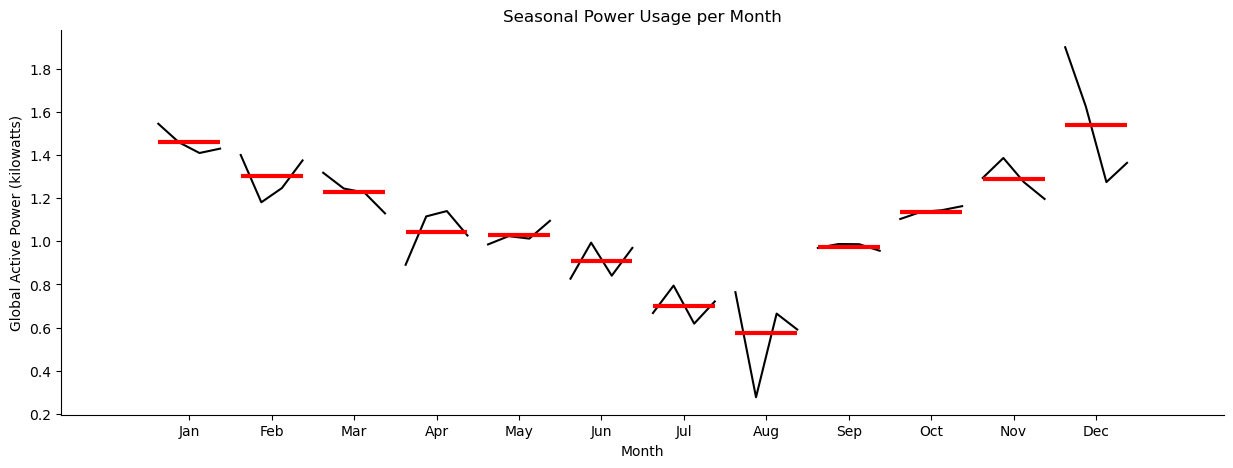

In [40]:
# Lets explore some seasonal patterns in the data.
from statsmodels.graphics.tsaplots import month_plot

plt.figure(figsize=(15, 5))

# create the seasonal plot
month_plot(power_df_clean_monthly["Global_active_power"], ax=plt.gca())
plt.xlabel("Month")
plt.ylabel("Global Active Power (kilowatts)")
plt.title("Seasonal Power Usage per Month")
sns.despine()
plt.show()

The red bars show the average for the given month across all years, while each black line represent an individual month and the progression of values across the years. 

Through the year, we can see that power consumption is highest in the winter months (December, January, February) and lowest in the summer months (June, July, August).The Global Active Power usage shows a clear seasonal pattern, with peaks in the winter months and troughs in the summer months.A U shaped is observed in the data, with the lowest values in the summer months and the highest values in the winter months.

Next we can look at the average Global active power for each month and see how much it differs from the overall average.

In [9]:
# monthly average
monthly_mean = power_df_clean_monthly.groupby(power_df_clean_monthly.index.month_name()).mean()

# relative deviation from the overall mean
monthly_mean_diff = (monthly_mean - monthly_mean.mean())/monthly_mean

# month names in right order
month_names = pd.date_range(start='2006-01' ,freq='M', periods=12).month_name()

# reorder columns to follow the month order
monthly_mean_diff = monthly_mean_diff.loc[month_names, ]

monthly_mean_diff['Global_active_power'].T

January      0.25
February     0.16
March        0.11
April       -0.05
May         -0.07
June        -0.21
July        -0.57
August      -0.92
September   -0.13
October      0.03
November     0.15
December     0.29
Name: Global_active_power, dtype: float64

 Lets visualize this data

In [14]:
fig = px.bar(monthly_mean_diff['Global_active_power'].T)

fig.update_layout(
    yaxis_title="", 
    yaxis_tickformat = '.1%',
    xaxis_title="",
    title="Monthly deviation from mean Global Active Power (%)",
    showlegend=False,
)
fig.show()

We can see that the positive highest deviation from the mean occurs in December at 28%,  and the highest negative deviation occurs in August at 91%, which is summer. This suggests that households use more energy during the winter months, likely for heating purposes, and less during the summer months.

### Trend-Seasonal Decomposition for Target Variable: Global Active Power

A fundamental step in time series EDA is the trend-seasonal decomposition. Here, we extract three series from our original Global Active Power variable: 
- a trend component $T_t$ calculated using a moving average,
- a seasonal component $S_t$ which is the monthly average of the de-trended series, and
- the residual $R_t$ that remains after subtracting the trend and seasonal component from the original series.

Adding up these three components will give back the original series:

$$y_t = T_t + S_t + R_t$$




In [15]:
GAP_df=power_df_clean_monthly[['Global_active_power']]
GAP_df.head()

,Global_active_power
DateTime,
2006-12-01,1.90
2007-01-01,1.55
2007-02-01,1.40
2007-03-01,1.32
2007-04-01,0.89


In [16]:
# decompose the time series
decomposition = tsa.seasonal_decompose(GAP_df, model='additive')

In [17]:
type(decomposition)

statsmodels.tsa.seasonal.DecomposeResult

In [18]:
#GAP_monthly = power_df_clean_monthl['Global_active_power'].copy()
GAP_df["Trend"] = decomposition.trend
GAP_df["Seasonal"] = decomposition.seasonal
GAP_df["Residual"] = decomposition.resid

GAP_df.head(10)

,Global_active_power,Trend,Seasonal,Residual
DateTime,,,,
2006-12-01,1.90,NaN,0.33,NaN
2007-01-01,1.55,NaN,0.34,NaN
2007-02-01,1.40,NaN,0.18,NaN
2007-03-01,1.32,NaN,0.11,NaN
2007-04-01,0.89,NaN,0.01,NaN
2007-05-01,0.99,NaN,-0.04,NaN
2007-06-01,0.83,1.13,-0.21,-0.09
2007-07-01,0.67,1.11,-0.39,-0.05
2007-08-01,0.76,1.10,-0.52,0.18


In [89]:
GAP_df.tail(10)

,Global_active_power,Trend,Seasonal,Residual
DateTime,,,,
2010-02-01,1.38,1.10,0.18,0.10
2010-03-01,1.13,1.09,0.11,-0.08
2010-04-01,1.03,1.09,0.01,-0.07
2010-05-01,1.10,1.09,-0.04,0.05
2010-06-01,0.97,NaN,-0.21,NaN
2010-07-01,0.72,NaN,-0.39,NaN
2010-08-01,0.59,NaN,-0.52,NaN
2010-09-01,0.96,NaN,-0.10,NaN
2010-10-01,1.16,NaN,0.05,NaN


The null values are due the fact that the trend component is calculated with a rolling average that is not defined at the beginning and end of the series.

In [90]:
cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=GAP_df.index, y=GAP_df[col]),
        row=i+1,
        col=1
    )

fig.update_layout(showlegend=False)
fig.show()

From the decomposition, we can see that the trend is generally decreasing over time, indicating a long-term decrease in global active power usage. The seasonal component shows a clear pattern of higher usage in winter months and lower usage in summer months, which is consistent with the expectation that households use more energy for heating in winter. The residuals show some random fluctuations around zero, indicating that there are no significant outliers or patterns left after accounting for trend and seasonality.

# Forecasting
 We can use the trend and seasonal components to forecast future values of the time series.

We will be looking at multistep(long-term) forecasts, first we need to see  check if our series is stationary series, stationary series  is where the statistical properties  of the series (such as mean and variance) dont change over time.

### Checking for stationarity
 We will be looking at multistep(long-term) forecasts, first we need to:

*Visual inspection:** Plot the series. Is there an obvious trend or seasonality?

**Summary statistics:** Compare mean and variance across different time windows.

*Formal tests:**

* ADF Test (Augmented Dickey-Fuller Test)

* KPSS Test

* These give a statistical p-value for stationarity.



In [20]:
GAP_df["seasonal_difference"] = GAP_df["Global_active_power"].diff(12)
GAP_df[["Global_active_power", "seasonal_difference"]].head(16)

,Global_active_power,seasonal_difference
DateTime,,
2006-12-01,1.90,NaN
2007-01-01,1.55,NaN
2007-02-01,1.40,NaN
2007-03-01,1.32,NaN
2007-04-01,0.89,NaN
2007-05-01,0.99,NaN
2007-06-01,0.83,NaN
2007-07-01,0.67,NaN
2007-08-01,0.76,NaN


In [41]:
GAP_df

,Global_active_power,Trend,Seasonal,Residual,seasonal_difference
DateTime,,,,,
2006-12-01,1.90,NaN,0.33,NaN,NaN
2007-01-01,1.55,NaN,0.34,NaN,NaN
2007-02-01,1.40,NaN,0.18,NaN,NaN
2007-03-01,1.32,NaN,0.11,NaN,NaN
2007-04-01,0.89,NaN,0.01,NaN,NaN
2007-05-01,0.99,NaN,-0.04,NaN,NaN
2007-06-01,0.83,1.13,-0.21,-0.09,NaN
2007-07-01,0.67,1.11,-0.39,-0.05,NaN
2007-08-01,0.76,1.10,-0.52,0.18,NaN


In [23]:
fig = px.line(GAP_df, x=GAP_df.index, y="seasonal_difference")

fig.update_layout(
    yaxis_title="Difference (kW)", 
    yaxis_tickformat = '.1',
    xaxis_title="Date",
    title="Change in Global Active Power over Prior Year"
)



fig.show()

Here, apart from some months in the summer, it looks like we got stationary data:
- there is no clear trend in the new series, 
- the variance is relatively constant, and
- there is no seasonality but some multiyear cycles can be clearly spotted (a _cyclical pattern_ is characterized by rises and falls of uneven frequency).

Our forecasting work will be based on predicting this differenced series instead of the original one.



### Splitting the  Series for Evaluation

Our main goal is to explore models which can reliably forecast future Power Household Power consumption. To get a fair evaluation of such models, we will use some of the available data for fitting the model and some for evaluating our forecast. This ensures that calculated metrics reflect the models performance on unseen, future data.  

For our case:
- we will use observations from December 1, 2006 to Nov 1, 2007 as the _training set_ to infer the model parameters, and
- subsequent records from Dec 1, 2007 to Nov 1, 2010  as _test data_ for evaluation. 

In [49]:
# we drop the null values introduced at differencing
train = GAP_df.loc[GAP_df.index <= "2007-11-01", "seasonal_difference"].dropna()
test = GAP_df.loc[GAP_df.index > "2007-11-01", "seasonal_difference"]

Series([], Freq: MS, Name: seasonal_difference, dtype: float64)

**Come back to this later**

In [ ]:
# Plotting the train and test sets
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.update_layout(
    yaxis_title="Difference (KW)", 
    xaxis_title="Date",
    title="Change in Global Active Power over Prior Year"
)
fig.show()

### Baseline Forecasts and Evaluation

There are a number of ways to make simple forecasts which can act as baselines for putting more complex models in context:
- for short-term forecasts, we can predict the last available value (or a rolling average of previous values);
- for long-term forecasts of stationary series, we can predict the mean over the training set;
- for non-stationary data, we can model the trend (e.g., using linear regression) to forecast future trend and add the seasonality to obtain a forecast for the whole series.

In [54]:
full_index = pd.concat([train, test]).index
base_line = np.full(full_index.shape, np.mean(train))

predictions = pd.Series(data=base_line, index=full_index)

In [60]:
full_index

DatetimeIndex(['2007-12-01', '2008-01-01', '2008-02-01', '2008-03-01',
               '2008-04-01', '2008-05-01', '2008-06-01', '2008-07-01',
               '2008-08-01', '2008-09-01', '2008-10-01', '2008-11-01',
               '2008-12-01', '2009-01-01', '2009-02-01', '2009-03-01',
               '2009-04-01', '2009-05-01', '2009-06-01', '2009-07-01',
               '2009-08-01', '2009-09-01', '2009-10-01', '2009-11-01',
               '2009-12-01', '2010-01-01', '2010-02-01', '2010-03-01',
               '2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01',
               '2010-08-01', '2010-09-01', '2010-10-01', '2010-11-01'],
              dtype='datetime64[ns]', name='DateTime', freq='MS')

In [57]:
base_line

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [56]:
predictions

DateTime
2007-12-01   NaN
2008-01-01   NaN
2008-02-01   NaN
2008-03-01   NaN
2008-04-01   NaN
2008-05-01   NaN
2008-06-01   NaN
2008-07-01   NaN
2008-08-01   NaN
2008-09-01   NaN
2008-10-01   NaN
2008-11-01   NaN
2008-12-01   NaN
2009-01-01   NaN
2009-02-01   NaN
2009-03-01   NaN
2009-04-01   NaN
2009-05-01   NaN
2009-06-01   NaN
2009-07-01   NaN
2009-08-01   NaN
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2009-12-01   NaN
2010-01-01   NaN
2010-02-01   NaN
2010-03-01   NaN
2010-04-01   NaN
2010-05-01   NaN
2010-06-01   NaN
2010-07-01   NaN
2010-08-01   NaN
2010-09-01   NaN
2010-10-01   NaN
2010-11-01   NaN
Freq: MS, dtype: float64

In [55]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="Mean Prediction"))

fig.update_layout(
    yaxis_title="Difference (billions)", 
    xaxis_title="Date",
    title="Change in Revenue Passenger Miles over Prior Year"
)
fig.show()

As with any regression model, we can use the mean absolute error or root mean squared error to evaluate our models (or apply other use-case specific measure of performance).Both previous metrics are heavily influenced by the scale of the data. To put these numbers into perspective, we can look at what percentage (on average) our prediction is off by the original value. This metric is called the _mean absolute percentage error_ (MAPE) and going forward, we will use this metric to compare our models quantitatively.

In [61]:
def mean_absolute_percentage_error(true_values, predicted_values):
    """
    Calculate the mean absolute percentage error. 
    Find the prediction error and devide by the true value, then average.
    """
    
    error = true_values - predicted_values
    absolute_percentage_error = np.abs(error/true_values)
    mape = absolute_percentage_error.mean() * 100
    
    return mape

train_mape = mean_absolute_percentage_error(train, predictions[train.index])
test_mape = mean_absolute_percentage_error(test, predictions[test.index])

print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")

Train MAPE on the difference: nan%
Test MAPE on the difference: nan%


# Linear regression model

We will be using a linear regression model to forecast the seasonal difference in Global Active Power.

In [62]:
power_df_clean.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,surface_pressure,cloudcover,windspeed_10m,windgusts_10m,winddirection_10m,shortwave_radiation,direct_radiation,diffuse_radiation
DateTime,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.22,0.42,234.84,18.40,0.00,1.00,17.00,7.12,94.20,6.24,4.10,1012.40,100.00,14.28,31.10,329.40,8.00,0.00,8.00
2006-12-16 17:25:00,5.36,0.44,233.63,23.00,0.00,1.00,16.00,7.11,94.17,6.22,4.09,1012.42,100.00,14.24,31.07,329.42,7.83,0.00,7.83
2006-12-16 17:26:00,5.37,0.50,233.29,23.00,0.00,2.00,17.00,7.10,94.13,6.21,4.08,1012.43,100.00,14.20,31.05,329.43,7.67,0.00,7.67
2006-12-16 17:27:00,5.39,0.50,233.74,23.00,0.00,1.00,17.00,7.08,94.10,6.20,4.08,1012.45,100.00,14.16,31.02,329.45,7.50,0.00,7.50
2006-12-16 17:28:00,3.67,0.53,235.68,15.80,0.00,1.00,17.00,7.07,94.07,6.18,4.07,1012.47,100.00,14.13,31.00,329.47,7.33,0.00,7.33


In [64]:
power_df_clean.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,surface_pressure,cloudcover,windspeed_10m,windgusts_10m,winddirection_10m,shortwave_radiation,direct_radiation,diffuse_radiation
count,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00
mean,1.09,0.12,240.84,4.63,1.12,1.30,6.46,11.20,76.62,6.85,8.75,1005.04,66.10,12.90,26.38,188.18,134.26,76.76,57.50
std,1.06,0.11,3.24,4.44,6.15,5.82,8.44,6.95,15.18,5.54,8.23,9.48,36.39,6.41,12.99,103.72,202.58,145.71,78.67
min,0.08,0.00,223.20,0.20,0.00,0.00,0.00,-10.40,23.00,-14.50,-15.10,959.20,0.00,0.00,2.20,1.00,0.00,0.00,0.00
25%,0.31,0.05,238.99,1.40,0.00,0.00,0.00,6.20,66.17,3.26,2.62,999.73,35.13,8.08,16.40,88.75,0.00,0.00,0.00
50%,0.60,0.10,241.01,2.60,0.00,0.00,1.00,11.26,79.65,7.32,8.60,1005.64,82.30,11.70,24.05,210.07,11.07,0.67,8.20
75%,1.53,0.19,242.89,6.40,0.00,1.00,17.00,16.25,89.23,10.96,14.90,1011.07,99.20,16.59,33.82,267.05,213.45,81.53,100.87
max,11.12,1.39,254.15,48.40,88.00,80.00,31.00,34.80,100.00,21.30,35.00,1031.70,100.00,51.70,99.00,360.00,908.00,779.00,417.00


In [65]:
# Pull out the X and y
X = power_df_clean.drop("Global_active_power", axis=1)
y = power_df_clean["Global_active_power"].copy()

In [66]:
X

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,surface_pressure,cloudcover,windspeed_10m,windgusts_10m,winddirection_10m,shortwave_radiation,direct_radiation,diffuse_radiation
DateTime,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,0.42,234.84,18.40,0.00,1.00,17.00,7.12,94.20,6.24,4.10,1012.40,100.00,14.28,31.10,329.40,8.00,0.00,8.00
2006-12-16 17:25:00,0.44,233.63,23.00,0.00,1.00,16.00,7.11,94.17,6.22,4.09,1012.42,100.00,14.24,31.07,329.42,7.83,0.00,7.83
2006-12-16 17:26:00,0.50,233.29,23.00,0.00,2.00,17.00,7.10,94.13,6.21,4.08,1012.43,100.00,14.20,31.05,329.43,7.67,0.00,7.67
2006-12-16 17:27:00,0.50,233.74,23.00,0.00,1.00,17.00,7.08,94.10,6.20,4.08,1012.45,100.00,14.16,31.02,329.45,7.50,0.00,7.50
2006-12-16 17:28:00,0.53,235.68,15.80,0.00,1.00,17.00,7.07,94.07,6.18,4.07,1012.47,100.00,14.13,31.00,329.47,7.33,0.00,7.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.00,240.43,4.00,0.00,0.00,0.00,-1.16,90.60,-2.52,-4.76,994.71,37.40,7.48,12.95,215.27,0.00,0.00,0.00
2010-11-26 20:59:00,0.00,240.00,4.00,0.00,0.00,0.00,-1.18,90.80,-2.51,-4.78,994.70,37.70,7.49,12.97,215.13,0.00,0.00,0.00
2010-11-26 21:00:00,0.00,239.82,3.80,0.00,0.00,0.00,-1.20,91.00,-2.50,-4.80,994.70,38.00,7.50,13.00,215.00,0.00,0.00,0.00


In [67]:
y

DateTime
2006-12-16 17:24:00   4.22
2006-12-16 17:25:00   5.36
2006-12-16 17:26:00   5.37
2006-12-16 17:27:00   5.39
2006-12-16 17:28:00   3.67
                      ... 
2010-11-26 20:58:00   0.95
2010-11-26 20:59:00   0.94
2010-11-26 21:00:00   0.94
2010-11-26 21:01:00   0.93
2010-11-26 21:02:00   0.93
Name: Global_active_power, Length: 2049280, dtype: float64

In [68]:
X.shape, y.shape

((2049280, 18), (2049280,))

we have 18 features to predict 1 target variable, so we are dealing with a multivariate regression problem

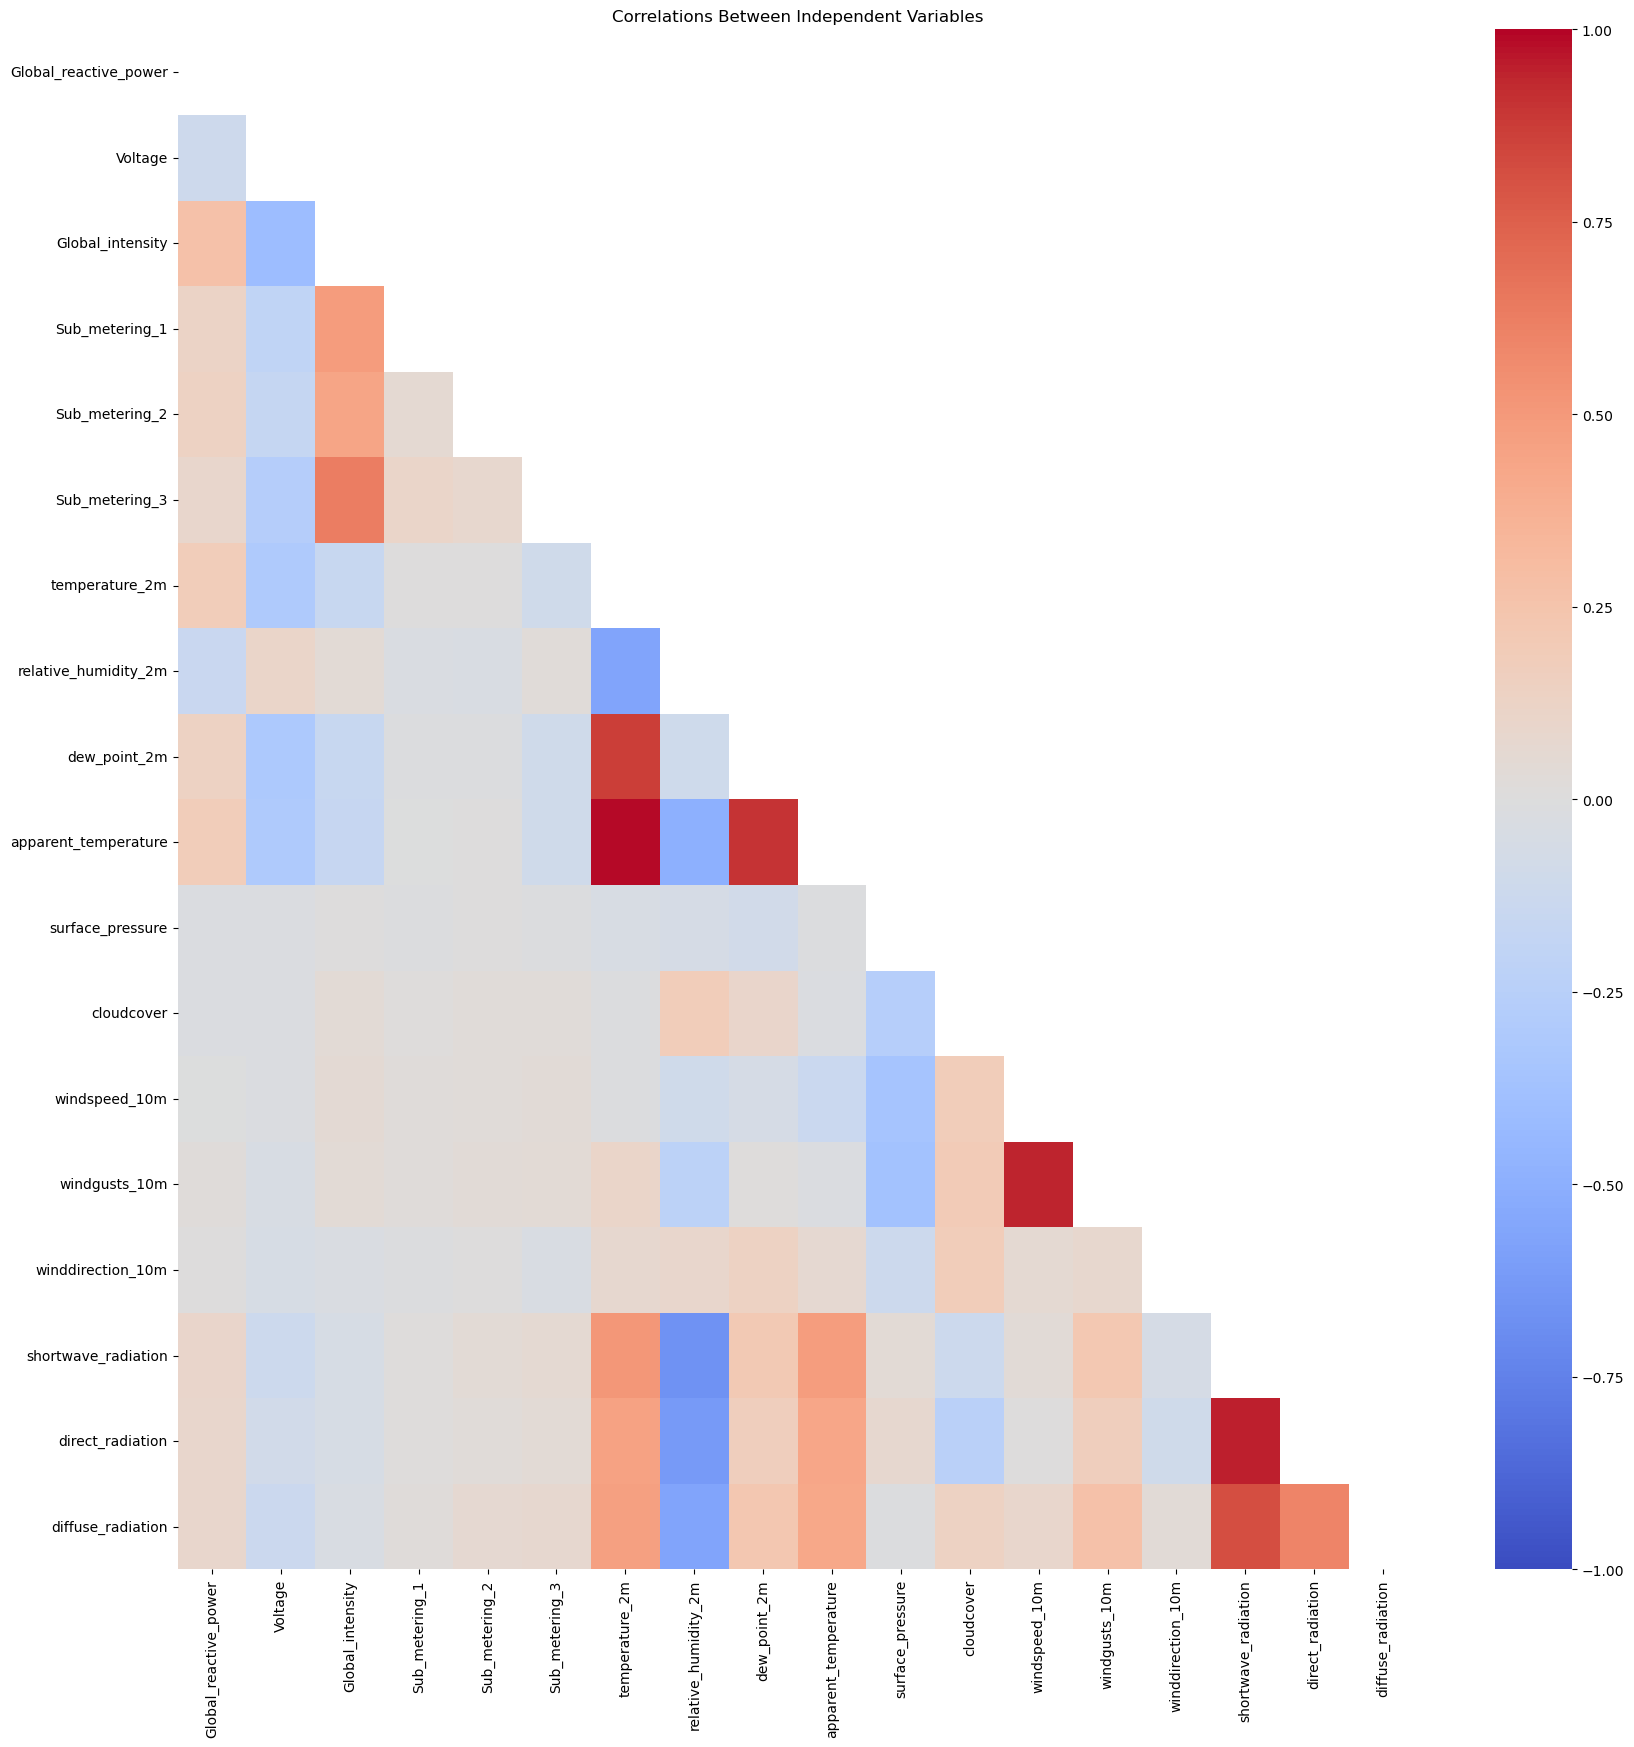

In [75]:
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(
    corr_df, 
    annot=True, 
    vmax=1, 
    vmin=-1, 
    center=0, 
    cmap="coolwarm", 
    mask=mask
)

plt.title("Correlations Between Independent Variables")
plt.show()

If two independent variables are highly correlated (|r| ≥ 0.8 or so), I will only  keep just one of them.

Strong correlations I notice from the map:


`Temperature-related variables`

**temperature_2m ↔ apparent_temperature (almost perfect correlation, r ≈ 1)**

**temperature_2m ↔ dew_point_2m (very high correlation)**

I will be keeping temperature_2m and drop apparent_temperature & possibly dew_point_2m.

`Wind speed variables`

**windspeed_10m ↔ windgusts_10m (perfect correlation, r = 1)**

I will be keeping windspeed_10m,  but will drop windgusts_10m.

`Radiation variables`

**Shortwave_radiation ↔ direct_radiation (very high correlation)**

**Shortwave_radiation ↔ diffuse_radiation (high correlation)**

I will drop all 3  radiation variables as I  dont see any relation of them to power consumption interpretability.

`Sub_metering variables`

Some correlations exist (e.g., Sub_metering_1 and Sub_metering_3 moderately correlated), but not as extreme — I will keep all of them as they are conceptually different.

Dropping variables for linear regression:

`apparent_temperature`

`dew_point_2m`

`windgusts_10m`

`direct_radiation,  diffuse_radiation, shortwave_radiation`

In [81]:
# Drop the identified columns
cols_to_drop = ["apparent_temperature", "dew_point_2m", "windgusts_10m", "direct_radiation", "diffuse_radiation", "shortwave_radiation"]
X.drop(cols_to_drop, axis=1, inplace=True)


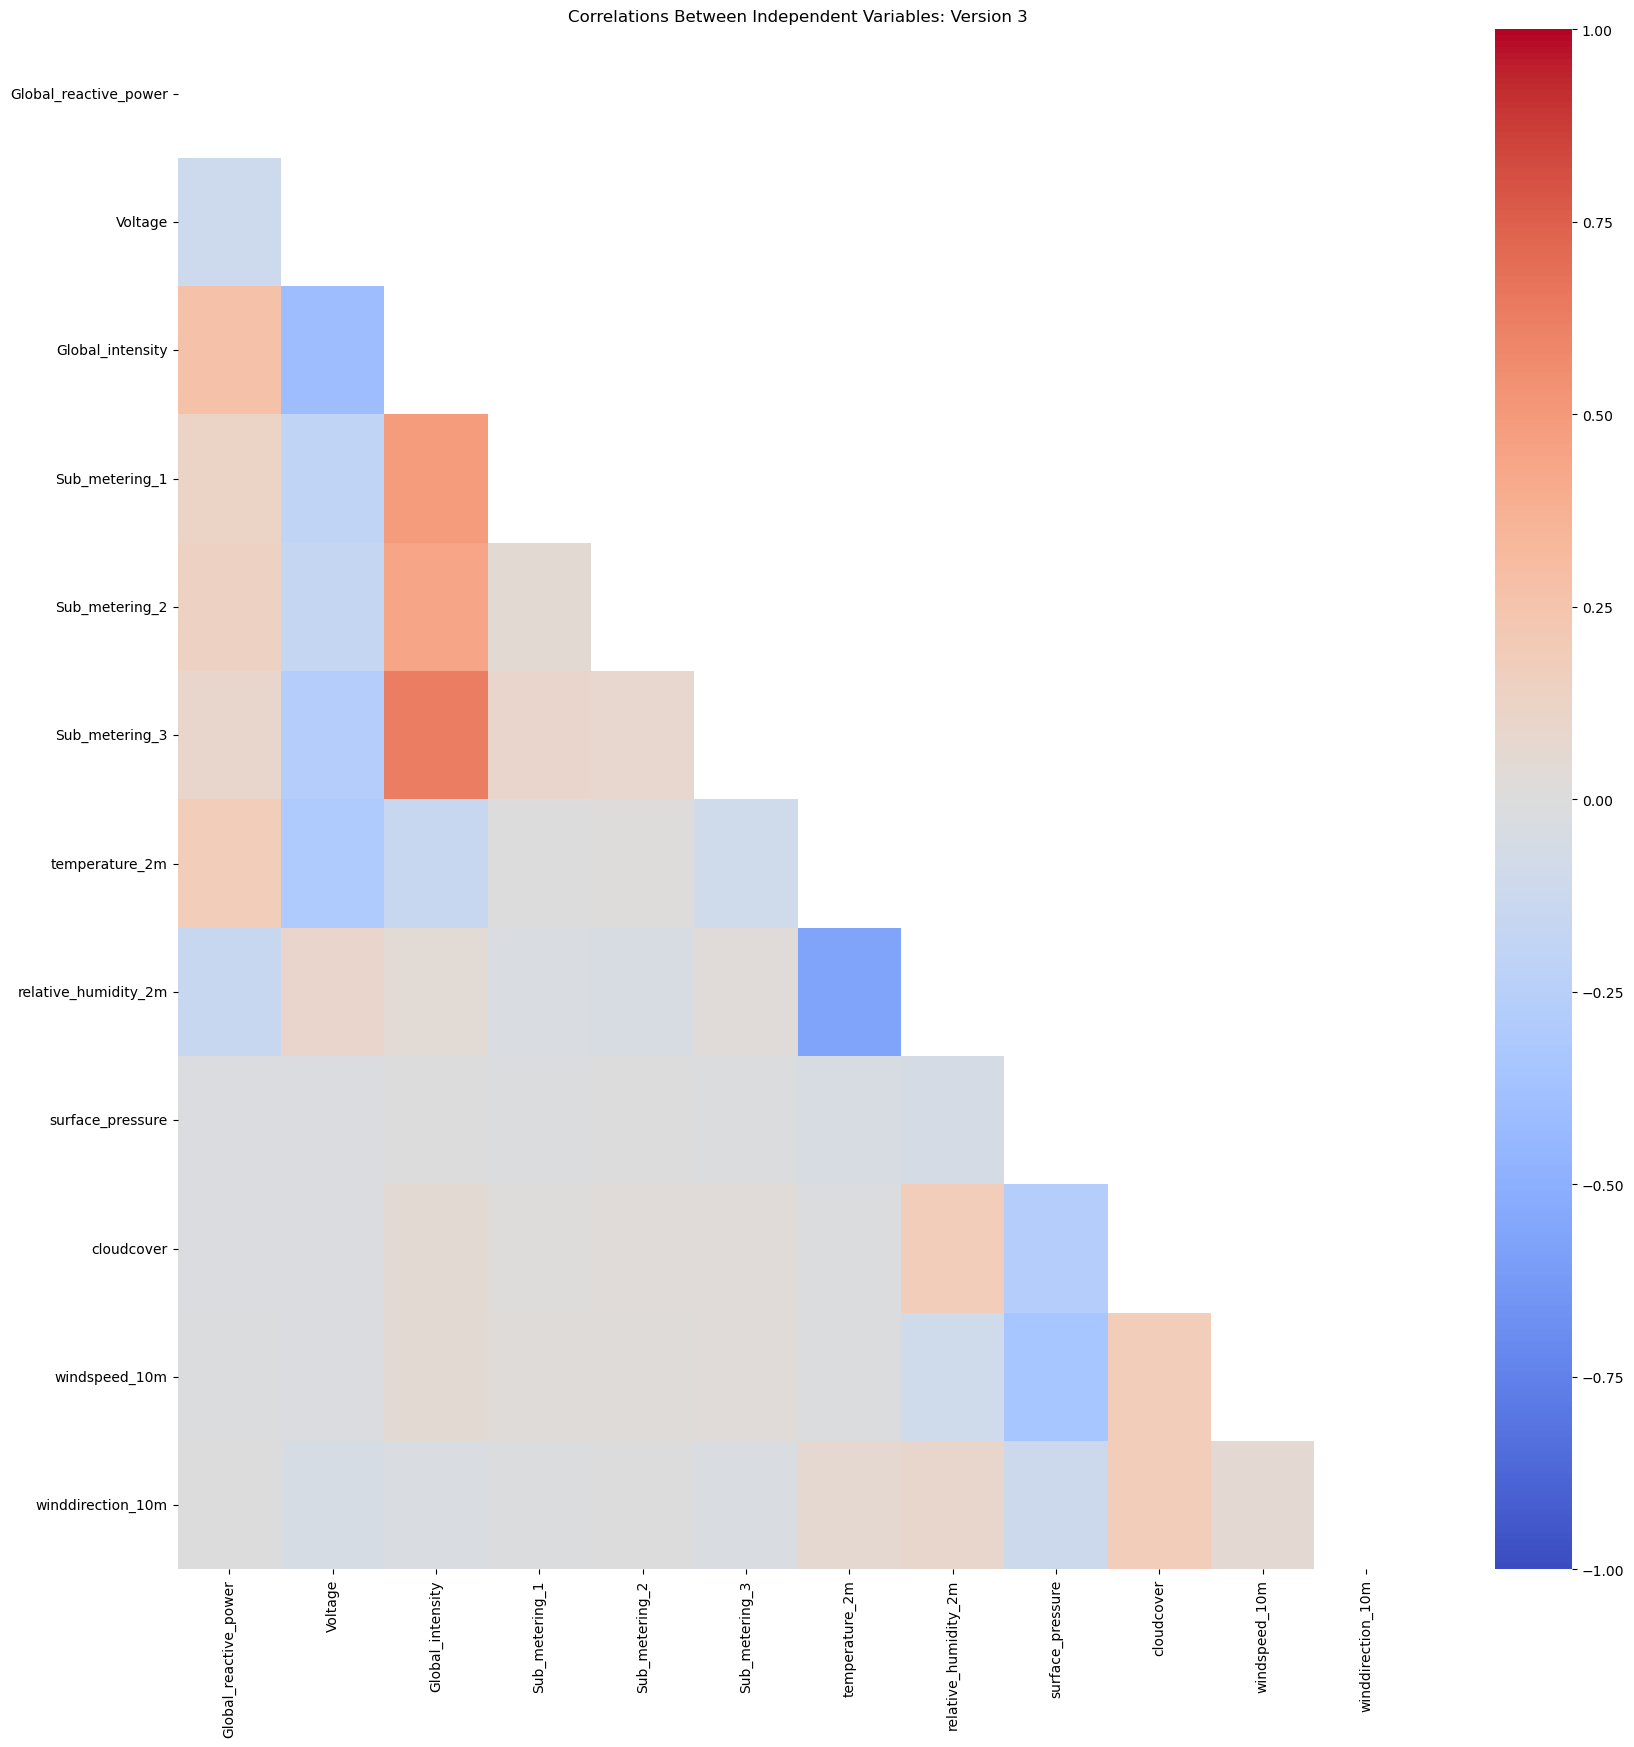

In [82]:
#checking the correlations again after dropping the columns
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(
    corr_df.round(2), 
    annot=True, 
    vmax=1, 
    vmin=-1, 
    center=0, 
    cmap="coolwarm", 
    mask=mask
)

plt.title("Correlations Between Independent Variables: Version 3")
plt.show()

In [91]:
X.corr().where(np.abs(corr_df) > 0.7)

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,temperature_2m,relative_humidity_2m,surface_pressure,cloudcover,windspeed_10m,winddirection_10m
Global_reactive_power,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voltage,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Global_intensity,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_1,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_2,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_3,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN
temperature_2m,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
relative_humidity_2m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN
surface_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
cloudcover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN


In [92]:
X.corr().where(np.abs(corr_df) < -0.7)

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,temperature_2m,relative_humidity_2m,surface_pressure,cloudcover,windspeed_10m,winddirection_10m
Global_reactive_power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voltage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Global_intensity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature_2m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relative_humidity_2m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
surface_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cloudcover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I dont why my correlator matrix is not showing all the values. I tried everything, so i use a table to see the actual values

So we can see that submetering_3 has by far the largest variance. Lets now scale the data. We will be using the Standard  scaler here 

In [76]:
corr_df = X.corr()

corr_df

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,surface_pressure,cloudcover,windspeed_10m,windgusts_10m,winddirection_10m,shortwave_radiation,direct_radiation,diffuse_radiation
Global_reactive_power,1.00,-0.11,0.27,0.12,0.14,0.09,0.18,-0.15,0.14,0.18,-0.02,-0.02,-0.01,0.02,0.00,0.10,0.09,0.09
Voltage,-0.11,1.00,-0.41,-0.20,-0.17,-0.27,-0.30,0.10,-0.32,-0.30,-0.02,-0.02,-0.02,-0.04,-0.05,-0.12,-0.09,-0.13
Global_intensity,0.27,-0.41,1.00,0.49,0.44,0.63,-0.15,0.04,-0.15,-0.16,0.00,0.05,0.05,0.04,-0.03,-0.05,-0.05,-0.04
Sub_metering_1,0.12,-0.20,0.49,1.00,0.05,0.10,0.00,-0.03,-0.01,-0.00,-0.01,0.01,0.02,0.02,-0.01,0.01,0.01,0.02
Sub_metering_2,0.14,-0.17,0.44,0.05,1.00,0.08,0.01,-0.04,-0.01,0.00,0.00,0.03,0.02,0.04,0.00,0.05,0.03,0.07
Sub_metering_3,0.09,-0.27,0.63,0.10,0.08,1.00,-0.10,0.03,-0.10,-0.10,-0.01,0.03,0.03,0.04,-0.03,0.06,0.04,0.07
temperature_2m,0.18,-0.30,-0.15,0.00,0.01,-0.10,1.00,-0.57,0.87,0.99,-0.04,-0.01,-0.01,0.11,0.07,0.51,0.46,0.46
relative_humidity_2m,-0.15,0.10,0.04,-0.03,-0.04,0.03,-0.57,1.00,-0.10,-0.50,-0.06,0.18,-0.10,-0.23,0.09,-0.67,-0.62,-0.57
dew_point_2m,0.14,-0.32,-0.15,-0.01,-0.01,-0.10,0.87,-0.10,1.00,0.90,-0.09,0.10,-0.06,0.01,0.14,0.21,0.17,0.23
apparent_temperature,0.18,-0.30,-0.16,-0.00,0.00,-0.10,0.99,-0.50,0.90,1.00,-0.01,-0.02,-0.14,-0.02,0.07,0.48,0.43,0.43


In [79]:
corr_df.where(np.abs(corr_df) > 0.5)

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,surface_pressure,cloudcover,windspeed_10m,windgusts_10m,winddirection_10m,shortwave_radiation,direct_radiation,diffuse_radiation
Global_reactive_power,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voltage,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Global_intensity,NaN,NaN,1.00,NaN,NaN,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_1,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_2,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_3,NaN,NaN,0.63,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature_2m,NaN,NaN,NaN,NaN,NaN,NaN,1.00,-0.57,0.87,0.99,NaN,NaN,NaN,NaN,NaN,0.51,NaN,NaN
relative_humidity_2m,NaN,NaN,NaN,NaN,NaN,NaN,-0.57,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.67,-0.62,-0.57
dew_point_2m,NaN,NaN,NaN,NaN,NaN,NaN,0.87,NaN,1.00,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apparent_temperature,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,0.90,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <a id='toc5_3_'></a>Detecting Multicollinearity With Variance Inflation Factors [&#8593;](#toc0_)

Looking only at correlations won't detect multicollinearity, hence we need a new tool: the **Variance Inflation Factor** (VIF). 

In order to calculate it, we build a regression model of each independent variable against the other independent variables and look at the $R^2$ score. The VIF for each predictor is defined as 
$$
\text{VIF}_i = \frac{1}{1-R_i^2}
$$

In a perfect scenario of no multicollinearity, the VIF for each predictor should be 1 (since the $R^2$ from each model would be 0, showing that the given independent variable can't be modeled by the other variables, hence no linear relationship). 

By common convention, any VIF value higher than 5 indicates high multicollinearity. Let's examine the VIF for the variables in our dataset:

In [93]:
# Adding the constant to the features 
X_with_const = sm.add_constant(X)
X_with_const

,const,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,temperature_2m,relative_humidity_2m,surface_pressure,cloudcover,windspeed_10m,winddirection_10m
DateTime,,,,,,,,,,,,,
2006-12-16 17:24:00,1.00,0.42,234.84,18.40,0.00,1.00,17.00,7.12,94.20,1012.40,100.00,14.28,329.40
2006-12-16 17:25:00,1.00,0.44,233.63,23.00,0.00,1.00,16.00,7.11,94.17,1012.42,100.00,14.24,329.42
2006-12-16 17:26:00,1.00,0.50,233.29,23.00,0.00,2.00,17.00,7.10,94.13,1012.43,100.00,14.20,329.43
2006-12-16 17:27:00,1.00,0.50,233.74,23.00,0.00,1.00,17.00,7.08,94.10,1012.45,100.00,14.16,329.45
2006-12-16 17:28:00,1.00,0.53,235.68,15.80,0.00,1.00,17.00,7.07,94.07,1012.47,100.00,14.13,329.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,1.00,0.00,240.43,4.00,0.00,0.00,0.00,-1.16,90.60,994.71,37.40,7.48,215.27
2010-11-26 20:59:00,1.00,0.00,240.00,4.00,0.00,0.00,0.00,-1.18,90.80,994.70,37.70,7.49,215.13
2010-11-26 21:00:00,1.00,0.00,239.82,3.80,0.00,0.00,0.00,-1.20,91.00,994.70,38.00,7.50,215.00


In [98]:
VIF_values = pd.Series(
    data=[variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])],
    index=X_with_const.columns
)

VIF_values[1:] # Slicing to leave out the constant

Global_reactive_power   1.18
Voltage                 1.50
Global_intensity        4.42
Sub_metering_1          1.65
Sub_metering_2          1.53
Sub_metering_3          2.14
temperature_2m          2.02
relative_humidity_2m    1.68
surface_pressure        1.23
cloudcover              1.17
windspeed_10m           1.21
winddirection_10m       1.06
dtype: float64

A high VIF means that the independent variable in question has a higher level of multi-collinearity with the other independent variables.

An obvious step would be to just drop the columns with the highest VIF numbers. One thing to note however is that dropping one variable will change the VIFs for *all the independent variables*.

For our case, as we see above none of our remaining variables has a VIF greater then 5. This means we can now proceed onwards to modeling.

In backward selection, we fit a model with all data available to us to start, then remove variables based upon whether or not they are significant (and informed by subject matter knowledge), until we reach a model of desired simplicity with sufficient predictive power.

In [ ]:
# Let's try fitting a model and check the result.
# 0. ADD THE CONSTANT!
X_const = sm.add_constant(X)

# 1. Instantiate the model
POWER_logit = sm.liner(y, X_const)

# 2. Fit the model to the data
bank_logit_fitted = bank_logit.fit()

# 3. Look at the results / summary table / assess model fit
bank_logit_fitted.summary()

In [92]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(power_df_house)
power_house_scaled_df = pd.DataFrame(data=scaled_data, columns=power_df_house.columns)
power_house_scaled_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.96,2.61,-1.85,3.10,-0.18,-0.05,1.25
1,4.04,2.77,-2.23,4.13,-0.18,-0.05,1.13
2,4.05,3.32,-2.33,4.13,-0.18,0.12,1.25
3,4.06,3.36,-2.19,4.13,-0.18,-0.05,1.25
4,2.43,3.59,-1.59,2.51,-0.18,-0.05,1.25


In [ ]:
# Instantiate the VarianceThresholder, we need to set a threshold variance
my_vt = VarianceThreshold(threshold=0.0004)

# Fit to the data and calculate the variances per column
my_vt.fit(power_house_scaled_df)

In [ ]:
 # Extract the variances per column and put in a dataframe
column_variances_df = pd.DataFrame(
    data=my_vt.variances_,
    index=subset_retail_scaled_df.columns,
    columns=["Variance"]
).sort_values("Variance")

# Plot with the threshold
plt.figure()

# Calculate the bar height to fill the space
bar_height = 1.0 / (len(column_variances_df.index) + 1)

plt.barh(column_variances_df.index, column_variances_df["Variance"], height=bar_height)
plt.axvline(0.0004, color=brand_colors["Supernova"], linestyle="--", label="Threshold=0.0004")

plt.xlabel("Variance")
plt.ylabel("Feature")
plt.title("Visualizing Results of Variance Thresholding")
plt.legend()
plt.show()

NameError: name 'subset_retail_scaled_df' is not defined